In [318]:
### Importing necessary libraries ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import seaborn as sns 


### Importing the reviews for all thriller movies from 2017-2021

In [319]:
Thriller_url ="https://raw.githubusercontent.com/ddb336/CSS-IMDb-Dataset/main/Data/genres-combined/Thriller_reviews_combined.csv"

In [320]:
thriller = pd.read_csv(Thriller_url)

thriller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20373 entries, 0 to 20372
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_id                      20373 non-null  object 
 1   review_title                  20373 non-null  object 
 2   review_title_sentiment_score  20373 non-null  float64
 3   review_text_sentiment_score   20373 non-null  float64
 4   date                          20373 non-null  object 
 5   rating                        20373 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 955.1+ KB


In [321]:
thriller.head()

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28 00:00:00,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20 00:00:00,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19 00:00:00,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18 00:00:00,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18 00:00:00,9


### Data Filtering

#### Fixing the 'date' column

In [322]:
## Chekcing the date column as it is an important independent variable in our research
thriller['date']

0        2021-03-28 00:00:00
1        2021-03-20 00:00:00
2        2021-03-19 00:00:00
3        2021-03-18 00:00:00
4        2021-03-18 00:00:00
                ...         
20368    2018-07-16 00:00:00
20369    2018-05-13 00:00:00
20370    2017-08-25 00:00:00
20371    2017-04-02 00:00:00
20372    2017-03-08 00:00:00
Name: date, Length: 20373, dtype: object

In [332]:
thriller['date'] = pd.to_datetime(thriller['date'])

# thriller['date'] = pd.DatetimeIndex(thriller['date']).year
# thriller['date'] = pd.to_datetime(thriller['date'],format='%m%Y', errors='coerce')



In [333]:
thriller.head()

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9


In [266]:
thriller.dtypes

title_id                                object
review_title                            object
review_title_sentiment_score           float64
review_text_sentiment_score            float64
date                            datetime64[ns]
rating                                   int64
dtype: object

#### Fixing the sentiment analysis columns

In [296]:
thriller.rename(columns={'review_title_sentiment_score': 'title_score', 'review_text_sentiment_score': 'text_score'},inplace=True)

In [297]:
thriller.head()

,title_id,review_title,title_score,text_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9


In [269]:
thriller.dtypes

title_id                object
review_title            object
title_score            float64
text_score             float64
date            datetime64[ns]
rating                   int64
dtype: object

In [270]:
thriller

,title_id,review_title,title_score,text_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9
...,...,...,...,...,...,...
20368,tt3862750,TOO GOOD TO BE TRUE\n,0.6908,0.0036,2018-07-16,6
20369,tt3862750,Great thriller\n,0.6705,0.6249,2018-05-13,9
20370,tt3862750,"Not bad, not good, just meh....\n",0.5981,0.8568,2017-08-25,5
20371,tt3862750,The Imperfect Guise\n,-0.3182,0.9873,2017-04-02,6


In [335]:
# thriller['date'] = thriller['date'].values.astype(float)

In [337]:
df = thriller[(thriller['date'] > '2020-3-1') & (thriller['date'] <= '2020-3-31')]


In [338]:
df

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
175,tt2267998,gone girl\n,0.0000,0.2263,2020-03-31,9
176,tt2267998,Hot\n,0.0000,0.3612,2020-03-31,10
177,tt2267998,Watching this movie made me feel sick\n,-0.5106,-0.7100,2020-03-30,2
178,tt2267998,Thought-provoking\n,0.0000,0.9937,2020-03-30,8
179,tt2267998,Fair but not fair enough\n,-0.2006,0.6808,2020-03-28,8
...,...,...,...,...,...,...
20126,tt2180994,Entertaining\n,0.4404,0.9633,2020-03-02,8
20127,tt2180994,A Good Marriage = A Bad Movie\n,-0.1531,0.7935,2020-03-02,3
20160,tt3896738,Australian gem about a sexual-predator serial...,-0.6486,-0.9531,2020-03-09,7
20238,tt4382872,Great Fight Scenes\n,0.3612,0.5994,2020-03-18,9


In [331]:
thriller.dtypes

title_id                                object
review_title                            object
review_title_sentiment_score           float64
review_text_sentiment_score            float64
date                            datetime64[ns]
rating                                   int64
dtype: object

In [ ]:
df

## Visualizations

In [273]:
### Testing for overall changes in mood and reviews over time 

<AxesSubplot:xlabel='date', ylabel='text_score'>

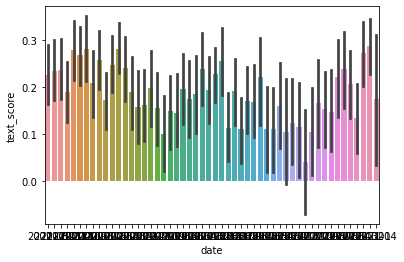

In [309]:
sns.barplot(x='date',y='text_score',data=thriller)

In [310]:
thriller['text_score'].unique()

array([ 0.981 ,  0.    , -0.9966, ..., -0.4316, -0.4489,  0.0036])

In [343]:
fig = plt.figure(figsize=(120,120))
sns.barplot(x='date',y='review_text_sentiment_score',data=thriller)
plt.xticks(rotation=50)
plt.tight_layout()

In [340]:
fig = plt.figure(figsize=(12,12))
sns.barplot(x='date',y='text_score',data=df)
plt.xticks(rotation=50)
plt.tight_layout()

ValueError: Could not interpret input 'text_score'

<Figure size 864x864 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12,12))
sns.barplot(x='date',y='text_score',data=thriller)
plt.xticks(rotation=50)
plt.tight_layout()

In [275]:
fig = plt.figure(figsize=(12,12))
# plt.scatter('date','review_title_sentiment_score',data=thriller['date'].loc[])
sns.distplot(thriller['data'].loc['2020-01-01':'2020-12-31'],color='green',bins=100)
# sns.clustermap(data=thriller)
plt.xticks(rotation=50)

KeyError: 'data'

<Figure size 864x864 with 0 Axes>

,review_title_sentiment_score,review_text_sentiment_score,rating
review_title_sentiment_score,1.000000,0.326019,0.412286
review_text_sentiment_score,0.326019,1.000000,0.441208
rating,0.412286,0.441208,1.000000
